# Chapter10:統計的推定
ここからが本題, 推測統計には**推定**,**検定**の二つがあるが今回は**推定**

- 点推定：母平均や母分散と言った様な母数の一つを推定する方法
- 区間推定：母数を幅を持って推定する方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from stats_package.modules import *

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv("../data/ch4_scores400.csv")
scores = np.array(df["点数"])

In [4]:
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

In [5]:
df["点数"].describe()

count    400.000000
mean      69.530000
std       14.393994
min       23.000000
25%       60.000000
50%       69.000000
75%       80.000000
max      100.000000
Name: 点数, dtype: float64

ある程度n数が多い場合正規分布に従う事が考えられるので$N(\mu,\sigma^2)$を重ねて図示してみる. 

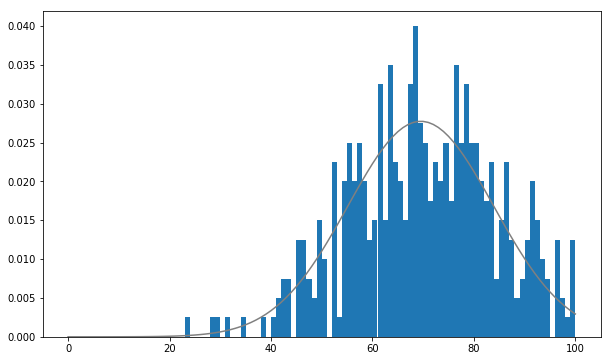

In [6]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

xs=np.arange(101)
rv = stats.norm(p_mean,np.sqrt(p_var))
ax.hist(scores,bins=100,density=True,
       range=(0,100))
ax.plot(xs, rv.pdf(xs),color="gray")

plt.show()

割とまあ, nがもっと増えればより正規分布に近づきそう.  
こっから20人分無作為抽出してみて推定してみるぞい. 

In [11]:
np.random.seed(0)
n=20
sample=np.random.choice(scores,n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

同様に20人分の無作為抽出を1万組用意しておく. 

In [10]:
np.random.seed(1111)
n_samples=10000
samples=np.random.choice(scores,(n_samples,n))

### 10.1:点推定
標本平均を用いてピンポイントに母平均を推定, 母分散の推定ってどうやるん？  
ってとこをやっていく, 但し対象とする分布は正規分布に従うものとして進めていく
#### 10.1.1:母平均の点推定

In [12]:
for i in range(5):
    s_mean=np.mean(samples[i])
    print(f"{i+1}回目の標本平均：{s_mean:.3f}")

1回目の標本平均：67.000
2回目の標本平均：72.850
3回目の標本平均：69.200
4回目の標本平均：64.450
5回目の標本平均：72.650


この標本平均$\overline{X}$の期待値はChapter9.3の様に$E(\overline{X})=\mu$となり母平均に一致する.  
この様な推定量の期待値が推測したい母数になる性質を**不偏性**といい, これを持っている推定量を**不偏推定量**という.  

ここで本当に標本平均の期待値が母数の平均に一致するのか大数の法則を用いて各人してみる.

In [14]:
sample_means=np.mean(samples, axis=1)
np.mean(sample_means) # 母平均は69.530

69.53799999999998

推定量がこの性質以外に持っているものとしてnが増えると推定したい母数に収束していく**一致性**というものがあり、これを持つ推定量を**一致推定量**という標本平均がこれに該当する

In [18]:
np.mean(np.random.choice(scores,int(1e6)))

69.535985

この様な二つの性質を持つ推定量は理想的な推定量である→本の方では良い推定量と読んでいる.  
他にも不偏推定量の中でも分散が最小になる性質を**有効性**と呼びより強力な推定量となる. 
ここで一つ目の標本で標本平均を出してみる. 

In [20]:
s_mean = np.mean(sample)
s_mean # これを元に後に区間推定を行っていく

70.4

#### 10.1.2:母分散の点推定
区間推定にいく前に, もう一つの母数である母分散について推定を行っていく. 
母平均←標本平均の様に, 母分散←標本分散でやっていく

標本分散：$\frac{1}{n}\sum_{i=1}^{n}(X_i-\overline{X})^2$

In [21]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f"{i+1}回目の標本分散：{s_var:.3f}")

1回目の標本分散：116.800
2回目の標本分散：162.928
3回目の標本分散：187.060
4回目の標本分散：149.148
5回目の標本分散：111.528


まず不偏性を大数の法則によって調べる, さっき用意した1万組の標本データを用いて標本分散を計算し確認する. 

In [22]:
sample_vars=np.var(samples, axis=1)
np.mean(sample_vars) # 母分散は206.669

196.34417850000003

10くらい小さいので不偏推定量ではなさそう, ここで登場するのが不偏分散で, 標本分散はnで割っていたがn-1で割る事になる.  
ここでのn-1は**自由度**と呼ばれ自由に値を取れる確率変数の数となる, 今回の場合式中の$(X_i-\overline{X})^2$で各$X_i$が
$$
\frac{1}{n}\sum_{i=1}^{n}X_i = \overline{X}
$$
を満たす必要があるため自由度1が減ってn-1となる.

In [31]:
sample_u_vars=np.var(samples, axis=1, ddof=1) # ddof=1で不偏分散となる
np.mean(sample_u_vars) # 母分散は206.669

206.67808263157895

不偏性持ってそう.

In [34]:
np.var(np.random.choice(scores,int(1e8)),ddof=1) #一致性もアリそう

206.64365873874092

ここで一つ目の抽出した標本で不偏分散を計算する.

In [35]:
u_var = np.var(sample, ddof=1)
u_var #これを用いて後に母分散の区間推定を後ほど行う

158.25263157894742

#### 10.1.3:点推定のまとめ
不偏性と一致性の二つの性質は良い推定量には必須,  
$\mu, \sigma^2$に従う独立の確率変数を持つ確率分布に従うとき.標本平均と不偏分散はこの二つの性質を持つ推定量である.

### 10.2:区間推定
点で推定したのに対してある程度の誤差を含めて範囲で推定するのが区間推定. 
#### 10.2.1:正規分布の母平均(分散既知)の区間推定
推定量である標本平均$\overline{X}$は$N(\mu,\frac{\sigma^2}{n})$となるので標準偏差±$\sqrt{\frac{\sigma^2}{n}}$という誤差を持つ, これを**標準誤差**という.  
これは分散$\sigma^2$が既知であるから計算できる.

標準化したものZは標本平均を$\mu$で引いて標準誤差で割る事で標準正規分布に直す事ができる.  
これにより100(1-α)%区間を計算する事ができる
$$
P(z_{0.975} \leq Z \leq z_{0.025})=0.95
$$
これを$\mu$についての不等式に直すと
$$
P(\overline{X}-z_{0.025}\sqrt{\frac{\sigma^2}{n}} \leq \mu \leq \overline{X}-z_{0.975}\sqrt{\frac{\sigma^2}{n}})=0.95
$$
となり母平均$\mu$が区間に含まれる確率が95％という意味になり標準誤差が区間を決めている事がよくわかる. 

これと同様先ほど用意した最初の一個の20個の標本にて区間推定をしてみる

In [38]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl # [64.1, 76.7]の例

(64.09956018535247, 76.70043981464754)

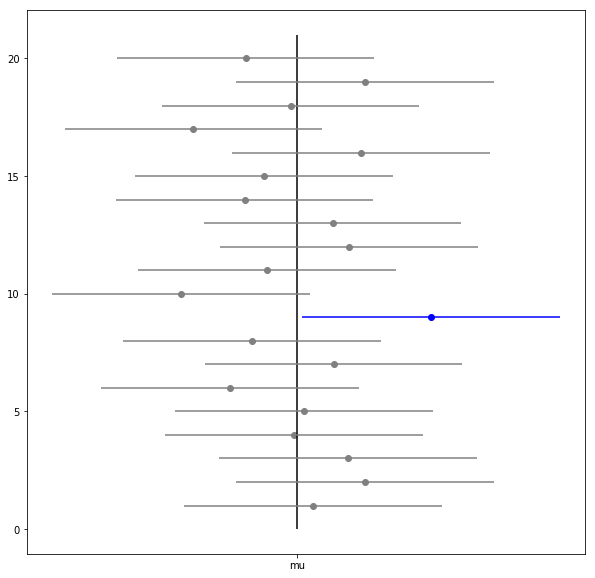

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['mu'])

plt.show() # 青の線(1/20)だけ区間推定だけ母平均を含んでいない

In [40]:
rv = stats.norm()
cnt = 0
# 10000の標本でやってみる
for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

95.1%の信頼区間が母平均を含んでいる

### 10.2.2:正規分布の母分散の区間推定(母平均未知) 
$$
P(* \leq \sigma^2 \leq *)
$$
という形にするため,  
標本平均同様, 不偏分散も何かしらの確率分布に従う確率変数を作る必要がある. 
ここでカイ二乗分布が出てくる.不偏分散$s^2$に$Y=(n-1)s^2/\sigma^2$という変換をする事で$$
Y \sim \chi^2(n-1)
$$
となる事が知られているためこのカイ二乗分布を使っていく形になる

In [41]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

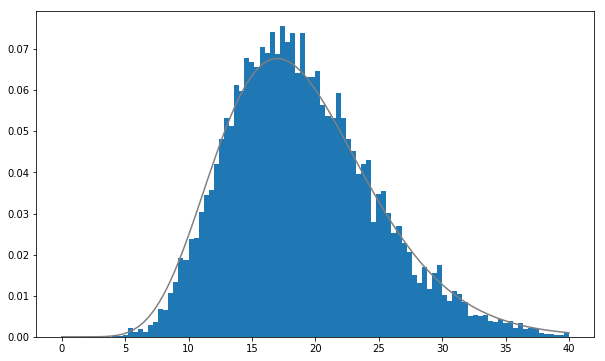

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show() # Yの標本データのヒストグラムと\chi^2(n-1)の密度関数

In [48]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl #[91.525, 337.596]の例

(91.52471947132238, 337.5955129124592)

みると分かるが正規分布ではなく少し歪んでいる. これは大体$\chi^2(n-1)$に従うのでこれを元に信頼区間を定義すると
$$
P(\frac{(n-1)s^2}{\chi_{0.025}^2(n-1)} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi_{0.975}^2(n-1)})
$$
の様になる.   
これと同様先ほど用意した最初の一個の20個の標本にて区間推定をしてみる

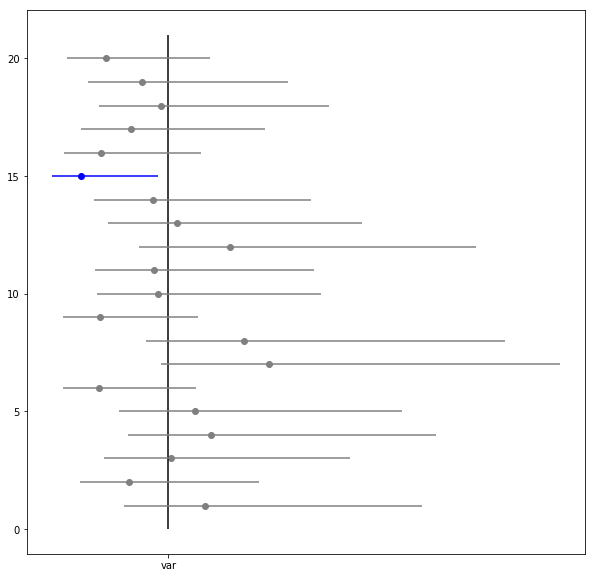

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['var'])

plt.show() #青線(1/20)だけ外れる形になる

母平均同様10000の標本で確かめる

In [46]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)

0.964

これと同様, 母分散だけ未知の場合は不偏分散で代用,   
従う確率分布(bernやbin, poissonなど)の平均や分散で代用して同じ様に推定していく形になる  
以下に実行例を示しておく

### 正規分布の母平均(母分散未知)の区間推定

In [49]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.51244886603887, 76.28755113396114)

### ベルヌーイ分布の母平均の区間推定

In [50]:
enquete_df = pd.read_csv('../data/ch10_enquete.csv')
enquete = np.array(enquete_df['知っている'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [51]:
s_mean = enquete.mean()
s_mean

0.709

In [52]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.6808474522924337, 0.7371525477075662)

### ポアソン分布の母平均の区間推定

In [53]:
n_access_df = pd.read_csv('../data/ch10_access.csv')
n_access = np.array(n_access_df['アクセス数'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])

In [54]:
s_mean = n_access.mean()
s_mean

10.444444444444445

In [55]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.697953549598202, 11.190935339290688)